In [3]:
# This is how we can check whether it returns are normally distributed or not also remmember this is the assumption of several models (Markowitz-model).

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [63]:
stocks = ['^NSEI']
start_date = '2024-01-01'
end_date = '2024-12-25'

In [65]:
def download_data():
    data = {}
    for stock in stocks:
        print(f"Downloading data for {stock}...")
        ticker = yf.download(stock, start_date, end_date)
        if 'Close' in ticker.columns:
            data['Price'] = ticker['Close']
        else:
            print(f"Warning: 'Close' data not available for {stock}")
    return pd.concat(data, axis=1)

In [67]:
stock_data = download_data()
stock_data

[*********************100%***********************]  1 of 1 completed

,Price
Ticker,^NSEI
Date,
2024-01-01,21741.900391
2024-01-02,21665.800781
2024-01-03,21517.349609
2024-01-04,21658.599609
2024-01-05,21710.800781
...,...
2024-12-18,24198.849609
2024-12-19,23951.699219


In [69]:
def calculate_returns(stock_data):
    stock_data['Price'] = np.log(stock_data['Price'] / stock_data['Price'].shift(1))
    return stock_data[1:]

In [105]:
def show_plot(stock_data):
    # normalize the histogram so that it aligns with the probability density function (PDF) 
    count, bins, _ = plt.hist(stock_data, bins=200, density=True, alpha=0.6, color='blue')

    stock_mean = stock_data.mean()
    stock_variance = stock_data.var()
    sigma = np.sqrt(stock_variance)

    x = np.linspace(stock_mean - 3 * sigma, stock_mean + 3 * sigma, 100)
    plt.plot(x, norm.pdf(x, stock_mean, sigma), color='orange', lw=2)

    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title("Stock Data with Fitted Normal Distribution")
    plt.show()

In [73]:
log_daily_returns = calculate_returns(stock_data)

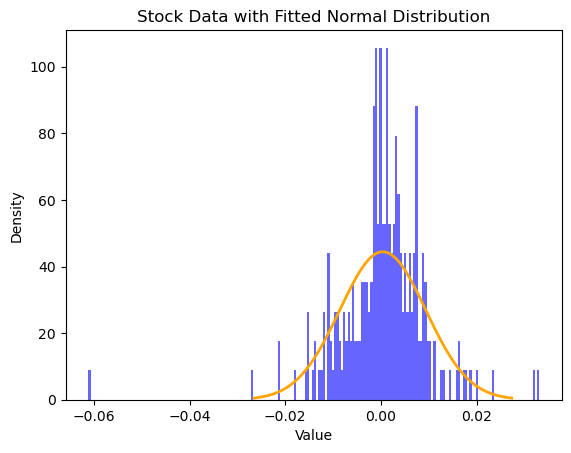

In [107]:
show_plot(log_daily_returns)